# Chap.13 さまざまな予測性能評価

In [1]:
# 13-1 データとモデルの準備
from sklearn.linear_model import LinearRegression
import pandas as pd

# 欠損値があるままでは学習できないので欠損値処理だけ行う
df = pd.read_csv('../support/datafiles/cinema.csv')
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']
model = LinearRegression()
model.fit(x, t)

LinearRegression()

In [2]:
# 13-2 平均二乗誤差を計算する
from sklearn.metrics import mean_squared_error

pred = model.predict(x)
# 訓練データでのMSE値
mse = mean_squared_error(pred, t)
mse

151986.03957624518

### 13.1.3 二乗平均平方根誤差（RMSE）

In [3]:
# 13-3 RMSEの計算
import math

# RMSEの計算
math.sqrt(mse)

389.85386951554705

In [5]:
# 13-4 予測結果と実際の誤差を検証する

from sklearn.metrics import mean_absolute_error

# 予測結果をリストで作成
yosoku = [2, 3, 5, 7, 11, 13]
# 実際の結果をリストで作成
target = [3, 5, 8, 11, 16, 19]

mse = mean_squared_error(yosoku, target)
print(f"rmse: {math.sqrt(mse)}")
print(f"mae: {mean_absolute_error(yosoku, target)}")

print('外れ値の混入')
# 実際には23だけど46と予測
yosoku = [2, 3, 5, 7, 11, 13, 46]
target = [3, 5, 8, 11, 16, 19, 23]

mse = mean_squared_error(yosoku, target)
print(f"rmse: {math.sqrt(mse)}")
print(f"mae: {mean_absolute_error(yosoku, target)}")


rmse: 3.8944404818493075
mae: 3.5
外れ値の混入
rmse: 9.411239481143202
mae: 6.285714285714286


## 13.2 分類の予測性能評価

### 13.2.1 適合率と再現率

In [8]:
# 13-5 データの準備
df = pd.read_csv('../support/datafiles/Survived.csv')
df = df.fillna(df.mean())

x = df[['Pclass', 'Age']]
t = df['Survived']

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_11149/2706489098.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [9]:
# 13-6 モデルの準備
from sklearn import tree

model = tree.DecisionTreeClassifier(
    max_depth=2, random_state=0
)
model.fit(x, t)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [10]:
# 13-7 再現率と適合率を計算する
from sklearn.metrics import classification_report

pred = model.predict(x)
out_put = classification_report(y_pred=pred, y_true=t)

# precision（適合率）, recall（再現率）
print(out_put)

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       549
           1       0.56      0.70      0.62       342

    accuracy                           0.67       891
   macro avg       0.67      0.68      0.67       891
weighted avg       0.69      0.67      0.68       891



In [11]:
# 13-8 classification_report()関数にパラメータ引数を指定する
out_put = classification_report(y_pred=pred, y_true=t, output_dict=True)

# out_putをデータフレームに変換
pd.DataFrame(out_put)

,0,1,accuracy,macro avg,weighted avg
precision,0.778742,0.558140,0.672278,0.668441,0.694066
recall,0.653916,0.701754,0.672278,0.677835,0.672278
f1-score,0.710891,0.621762,0.672278,0.666326,0.676680
support,549.000000,342.000000,0.672278,891.000000,891.000000


### 13.2.2 f1-score

## 13.3 K分割交差検証

### 13.3.1 ホールドアウト法の問題点

### 13.3.2 K分割交差検証

In [12]:
# 13-9 K分割交差検証のためのデータの準備
df = pd.read_csv('../support/datafiles/cinema.csv')

# 学習できないので欠損値処理だけ行う
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']

In [13]:
# 13-10 KFoldの処理で分割時の条件を指定
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=0)

In [14]:
# 13-11 cross_validate()関数で交差検証を行う
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = cross_validate(
    model, x, t, cv=kf, scoring='r2', return_train_score=True
)
print(result)

{'fit_time': array([0.00513101, 0.00443316, 0.00342393]), 'score_time': array([0.00239968, 0.00388503, 0.00195098]), 'test_score': array([0.72465051, 0.71740834, 0.75975591]), 'train_score': array([0.76928501, 0.76368104, 0.75780074])}


In [16]:
# 13-12 平均値を計算する
sum(result['test_score']) / len(result['test_score'])

0.7339382541774343

### 13.3.3 分類モデルと作るときの交差検証の注意点

In [18]:
# 13-13 StratifiedKFoldのインポート
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(
    n_splits = 5, shuffle = True, random_state = 0
)

In [19]:
from sklearn.tree import DecisionTreeClassifier

iris = pd.read_csv("../support/datafiles/iris.csv")

iris = iris.fillna(iris.mean())

x = iris.loc[:, :"花弁幅"]
t = iris["種類"]
model = DecisionTreeClassifier(random_state=0)

result = cross_validate(
    model, x, t, cv=skf, scoring='accuracy', return_train_score=True
)

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_11149/3465352863.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris = iris.fillna(iris.mean())


In [20]:
result

{'fit_time': array([0.00416899, 0.00205588, 0.0019238 , 0.00243402, 0.00185418]),
 'score_time': array([0.00195193, 0.00125909, 0.0010941 , 0.00153327, 0.00110269]),
 'test_score': array([0.93333333, 0.9       , 0.86666667, 0.9       , 0.93333333]),
 'train_score': array([1., 1., 1., 1., 1.])}

## 13.5 練習問題

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

# 追加
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import numpy as np

%matplotlib inline

In [23]:
df = pd.read_csv('../support/datafiles/Bank.csv')

# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name = [
    'job', 'default', 'marital','education', 'housing', 
    'loan', 'contact', 'month'
]
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2 = pd.get_dummies(str_df, drop_first=True)
# 数値列を抜き出す
num_df = df.drop(str_col_name, axis=1)  
# 結合(今後の集計の利便性も考慮してstr_dfも結合しておく)
df2 = pd.concat([num_df, str_df2, str_df], axis=1)

#訓練&検証データとテストデータに分割
train_val, test = train_test_split(df2, test_size=0.1, random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,0,0,...,0,0,services,no,single,secondary,yes,no,cellular,may


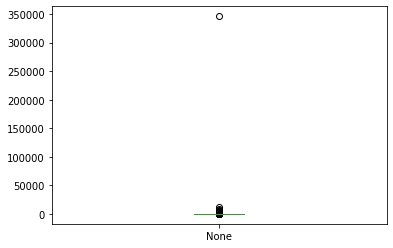

In [24]:
from sklearn.covariance import MinCovDet

# 欠損値の補正
num_df = train_val.drop(str_col_name, axis=1)
num_df = num_df.drop('id', axis=1)
num_df2 = num_df.dropna()
mcd2 = MinCovDet(random_state=0, support_fraction=0.7)
mcd2.fit(num_df2)
dis = mcd2.mahalanobis(num_df2)
dis = pd.Series(dis)
dis.plot(kind="box")
no = dis[dis > 300000].index
#先頭から2561番目が外れ値となる事が分かったので９章の付録で紹介したilocを利用する
no = num_df2.iloc[no[0]:(no[0]+1), :].index
train_val2 = train_val.drop(no)

In [25]:
# 欠損行を削除
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

# df2は外れ値が無いデータ
not_nan_df = train_val2.dropna()
temp_t = not_nan_df[['duration']]
temp_x = not_nan_df.drop(str_col_name, axis=1)

# durationとyに関係があるという仮定が成り立つならば、適切な推定をするためには,
temp_x = temp_x.drop(['y', 'duration', 'id'], axis=1)

a, b, c, d = train_test_split(temp_x, temp_t, random_state=0, test_size=0.2)

maxvalue = 0
v = 0
# 今回はLasso回帰を利用するので、特徴量選択はしない
for i in range(1, 42):
    val = i/20
    model_liner = Lasso(random_state=0, alpha=val)
    # 今回は予測させたいだけなので、標準化はしない
    model_liner.fit(a, c)
    if maxvalue < model_liner.score(b, d):
        v = val
        maxvalue = model_liner.score(b, d)
        
print(v, maxvalue)
model_liner = Lasso(random_state=0, alpha=v)
# 今回は予測させたいだけなので、標準化はしない
model_liner.fit(a, c)
# pd.Series(model_liner)


0.15 0.7304944115519963


Lasso(alpha=0.15, random_state=0)

In [26]:
# 実際に使うのは外れ値込みのデータ
train_val3 = train_val.copy()
is_null = train_val3['duration'].isnull()
temp_x = train_val3.drop(str_col_name, axis=1)
temp_x = temp_x.drop(['y', 'duration', 'id'], axis=1)
temp_x = temp_x[is_null]
# non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(temp_x)
train_val3.loc[is_null, 'duration'] = pred_d

In [27]:
# 12章付録で紹介したアンダーサンプリングを行う
def under_sampling(train_val):
    y_0 = train_val[train_val['y'] == 0]
    y_1 = train_val[train_val['y'] == 1]
    num_1 = len(y_1)
    #Y=1と同じ件数だけサンプリング
    y_0_2 = y_0.sample(n=num_1, random_state=0)
    train_val2 = pd.concat([y_1, y_0_2])

    return train_val2

- 学習をさせよう。
- ただし、13章で学習した知識を使いたい。
- これまでは正解率を考えてきたが、今回のケースだと適合率再現率のどちらを見るべきだろうか？

- y=1の適合率が高い⇒無駄なアポイントメントを減らす事が出来る。
- y=1の再現率が高い⇒潜在顧客を見逃さない

- スッキリ銀行は、効率よくキャンペーンを回したいと考えているので、y=1適合率に着目する

In [28]:
# まず、さくっと学習できるようなlearn関数を定義する。
# ただし、正解率では無くて適合率をみる
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

def learn(x, t, i):
    x_train, x_val, y_train, y_val = train_test_split(
        x, t, test_size=0.2, random_state=13
    )
    datum = [x_train, x_val, y_train, y_val]
    base = DecisionTreeClassifier(
        max_depth=i, random_state=0, class_weight="balanced"
    )
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)

    # 追加
    base.fit(x_train, y_train)
    train_pred = base.predict(x_train)
    test_pred = base.predict(x_val)
    result = classification_report(
        y_pred=test_pred, y_true=y_val, output_dict=True
    )

    return result, base, datum

t = train_val3['y']
x = train_val3.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)

res, model, datum = learn(x, t, i=8)
res_df = pd.DataFrame(res)
res_df
#res_df.iloc[0,1]

,0,1,accuracy,macro avg,weighted avg
precision,0.908992,0.587765,0.769199,0.748378,0.810315
recall,0.741058,0.832667,0.769199,0.786862,0.769199
f1-score,0.816479,0.689103,0.769199,0.752791,0.777351
support,3383.000000,1500.000000,0.769199,4883.000000,4883.000000


In [29]:
# 適合率が低い。
# 12章で学習したランダムフォレストとアダブーストだとどうなるか？
def learn2(x, t, i, de=5, forest=True):
    x_train, x_val, y_train, y_val = train_test_split(
        x, t, test_size=0.2, random_state=13
    )
    datum = [x_train, x_val, y_train, y_val]
    model = None
    if forest:
        model = RandomForestClassifier(
            n_estimators=i, random_state=0, max_depth=de, class_weight="balanced"
        )
    #datas=[x_train,x_val,y_train,y_val]
    else:
        base = DecisionTreeClassifier(
            max_depth=de, random_state=0, class_weight="balanced"
        )
        model = AdaBoostClassifier(
            n_estimators=i, base_estimator=base, random_state=0
        )
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_val)
    result = classification_report(
        y_pred=test_pred, y_true=y_val, output_dict=True
    )
    
    return result, model, datum

t = train_val3['y']
x = train_val3.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)

In [30]:
# ランダムフォレストでの検証
print("=================random_forest=========================")
max_pre = 0
for i in [50, 100, 150, 200]:#esti
    for j in range(5, 11):#depth
        res, model, datum = learn2(x, t, i=i, de=j, forest=True)
        res2 = pd.DataFrame(res)
        pre = res2.iloc[0, 1]
        if max_pre < pre:
            max_pre = pre
            print(max_pre, i, j)
        print(i, j, pre, "finish next_i")

# アダブーストでの検証
print("=================adaboost=========================")
max_pre = 0
for i in [50, 100, 150, 200]:#esti
    for j in range(5, 11):#depth
        res, model, datum = learn2(x, t, i=i, de=j, forest=False)
        res2 = pd.DataFrame(res)
        pre = res2.iloc[0, 1]
        if max_pre < pre:
            max_pre = pre
            print(max_pre, i, j)
        print(i, j, pre, "finish next_i")

=================random_forest=========================
0.559322033898305 50 5
50 5 0.559322033898305 finish next_i
0.5614552605703048 50 6
50 6 0.5614552605703048 finish next_i
0.5669099756690997 50 7
50 7 0.5669099756690997 finish next_i
0.5786350148367952 50 8
50 8 0.5786350148367952 finish next_i
0.5846308387744852 50 9
50 9 0.5846308387744852 finish next_i
0.5903614457831325 50 10
50 10 0.5903614457831325 finish next_i
100 5 0.5660282258064516 finish next_i
100 6 0.56575682382134 finish next_i
100 7 0.5690854870775348 finish next_i
100 8 0.5752343364578194 finish next_i
100 9 0.5838790931989924 finish next_i
100 10 0.589006555723651 finish next_i
150 5 0.5648893360160966 finish next_i
150 6 0.5663189269746647 finish next_i
150 7 0.5690936106983655 finish next_i
150 8 0.5758620689655173 finish next_i
150 9 0.5837081459270365 finish next_i
0.592741935483871 150 10
150 10 0.592741935483871 finish next_i
200 5 0.5668179525970751 finish next_i
200 6 0.5674464907914385 finish next_i
200

- 非常に時間がかかるので途中で終了。
- random_forestよりadaboostの方がvalデータの精度が良く、
- その中でもestimator=100,max_depth=8が最も高い

In [31]:
# estimatorの値を100と固定して、max_depthについての考察を深める。
# k-分割交差検証で最適なmax_depthを考察する
def learn_k_valid(x, t, i, dep):
    base = DecisionTreeClassifier(
        max_depth=dep, random_state=0, class_weight="balanced"
    )
    model = AdaBoostClassifier(
        n_estimators=150, base_estimator=base, random_state=0
    )
    kv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    result = cross_validate(
        model, x, t, cv=kv, scoring='precision', return_train_score=True
    )
    #base.fit(x_train,y_train)
    #train_pred = base.predict(x_train)
    #test_pred = base.predict(x_val)
    #result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result

In [32]:
t = train_val3['y']
x = train_val3.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)
for j in range(2, 10):
    res = learn_k_valid(x, t, i=100, dep=j)
    res2 = res["train_score"]
    # 平均値
    print(j, sum(res2)/len(res2), end="  ")
    res3 = res["test_score"]
    # 平均値
    print(j, sum(res3)/len(res3))  
    print(" j end next")

2 0.693870965005931  2 0.6559046281758386
 j end next
3 0.7363985362053104  3 0.6424140367280208
 j end next
4 0.825276543095041  4 0.6301842720480172
 j end next
5 0.9495102037655684  5 0.6249265745761058
 j end next
6 1.0  6 0.6234441059456995
 j end next
7 1.0  7 0.6366378009306722
 j end next
8 1.0  8 0.6604879801641672
 j end next
9 1.0  9 0.6708045411964312
 j end next


- 検証データの適合率が最も良いのは深さ9だが、明らかに過学習している。
- アンダーサンプリングで不均衡データの影響が変わるか確認してみる

In [33]:
train_val4 = under_sampling(train_val3)
t = train_val4['y']
x = train_val4.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)
for j in range(2, 10):
    res = learn_k_valid(x, t, i=100, dep=j)
    res2 = res["train_score"]
    # 平均値
    print(j, sum(res2)/len(res2), end="  ")  
    res3 = res["test_score"]
    # 平均値
    print(j, sum(res3)/len(res3)) 
    print(" j end next")

2 0.8358366359771408  2 0.7958753028990714
 j end next
3 0.8827649771765654  3 0.7740156492673792
 j end next
4 0.9510066312264068  4 0.7509248459530419
 j end next
5 0.9994243683853746  5 0.7341253901909622
 j end next
6 1.0  6 0.7402251532592067
 j end next
7 1.0  7 0.7452506069662589
 j end next
8 1.0  8 0.7577807266632144
 j end next
9 1.0  9 0.7592334958553092
 j end next


- 深さ2~３当たりが最もよさそうである。
- テストデータで検証するために再学習

In [34]:
train_val4 = under_sampling(train_val3)
t = train_val4['y']
x = train_val4.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)
base_model = RandomForestClassifier(
    max_depth=3, random_state=0, class_weight="balanced"
)
model = AdaBoostClassifier(
    random_state=0, n_estimators=100, base_estimator=base_model
)
model.fit(x, t)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=3,
                                                         random_state=0),
                   n_estimators=100, random_state=0)

In [35]:
# テストデータ
test2 = test.copy()
isnull = test2['duration'].isnull()
print(isnull.shape)

if isnull.sum() > 0:
    temp_x = test2.drop(str_col_name, axis=1)
    temp_x = temp_x.drop(['y', 'duration', 'id'], axis=1)
    temp_x = temp_x[isnull]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull, 'duration'] = pred_d
x_test = test2.drop(str_col_name, axis=1)
x_test = x_test.drop(['id', 'y', 'day'], axis=1)
y_test = test['y']

(2713,)


In [36]:
pre = model.predict(x_test)
result = classification_report(
    y_pred=pre, y_true=y_test, output_dict=True
)
pd.DataFrame(result)

,0,1,accuracy,macro avg,weighted avg
precision,0.896722,0.640511,0.793218,0.768617,0.814655
recall,0.786334,0.807825,0.793218,0.797080,0.793218
f1-score,0.837908,0.714504,0.793218,0.776206,0.798381
support,1844.000000,869.000000,0.793218,2713.000000,2713.000000


- y=1の適合率は0.64

In [37]:
# 本書で紹介していないnumpyのテクニックを使っているが
# 同様の事はpandasでもできる
# 参考 予測確率の閾値を変更する事により予測結果を変えて調整する
# 確率でいったん予測させる
y_p = model.predict_proba(x)
y_p
# y=1の確率を抜き出す
a = y_p[:,1]

In [38]:
def conf(a, th=0.5):
    import numpy as np
    from sklearn.metrics import confusion_matrix

    # 閾値以下なら0,以上なら1
    y_pre = np.where(a < th, 0, 1)
    # 混同行列をscikit-learnの関数で作成
    mat = confusion_matrix(y_pred=y_pre, y_true=t)
    pre = mat[1, 1]/(mat[1, 1] + mat[0, 1])
    re = mat[1, 1]/(mat[1, 1] + mat[1, 0])
    f1 = 2 * (pre * re) / (pre + re)

    # 適合率、ｆ１スコア、混同行列
    return pre, f1, mat

In [39]:
# 閾値0.5
conf(a, 0.5)

(0.8324248954240081,
 0.8364006877666688,
 array([[6492, 1322],
        [1247, 6567]]))

In [40]:
# presitionを上げるためには閾値をもう少しあげればよい
# ただし、閾値を上げすぎると適合率が低下してしまうのでf1スコアも意識する
for i in range(1, 30):
    val = 0.50 + (i / 1000)
    print(i)
    
    # 閾値0.5
    b = conf(a, val)
    print(val, b[0], b[1])

1
0.501 0.8675943193229092 0.8181264795400744
2
0.502 0.8975954262653438 0.7758157110675095
3
0.503 0.9247648902821317 0.730763276048924
4
0.504 0.9485172004744958 0.6647269099675783
5
0.505 0.9677904876580373 0.5774066091954023
6
0.506 0.9805371739976645 0.48521621881922383
7
0.507 0.9871332990221308 0.3931536332889208
8
0.508 0.990909090909091 0.3065772392903505
9
0.509 0.9950787401574803 0.2289920724801812
10
0.51 1.0 0.1717360786148807
11
0.511 1.0 0.1214088231758625
12
0.512 1.0 0.08621111927504285
13
0.513 1.0 0.05597711158104242
14
0.514 1.0 0.03643673828370398
15
0.515 1.0 0.023273463192512014
16
0.516 1.0 0.012968849332485696
17
0.517 1.0 0.007649158592554818
18
0.518 1.0 0.005869592956488452
19
0.519 1.0 0.0035769034236075624
20
0.52 1.0 0.002045512656609563
21
0.521 1.0 0.0010232796111537478
22
0.522 1.0 0.0007675578866572853
23
0.523 1.0 0.0005117707267144319
24
0.524 1.0 0.00025591810620601403
25
0.525 1.0 0.00025591810620601403
26
0.526 nan nan
27
0.527 nan nan
28
0.528 n

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_11149/2172774708.py:9: RuntimeWarning: invalid value encountered in long_scalars
  pre = mat[1, 1]/(mat[1, 1] + mat[0, 1])
/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_11149/2172774708.py:9: RuntimeWarning: invalid value encountered in long_scalars
  pre = mat[1, 1]/(mat[1, 1] + mat[0, 1])
/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_11149/2172774708.py:9: RuntimeWarning: invalid value encountered in long_scalars
  pre = mat[1, 1]/(mat[1, 1] + mat[0, 1])
/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_11149/2172774708.py:9: RuntimeWarning: invalid value encountered in long_scalars
  pre = mat[1, 1]/(mat[1, 1] + mat[0, 1])


In [41]:
# 閾値を0.503にすると全体的に最もよさそう。
th = 0.503
# テストデータ
proba = model.predict_proba(x_test)


In [42]:
a = proba[:, 1]
pre = np.where(a < th, 0, 1)
result = classification_report(y_pred=pre, y_true=y_test, output_dict=True)
pd.DataFrame(result)

,0,1,accuracy,macro avg,weighted avg
precision,0.813288,0.743472,0.796535,0.778380,0.790925
recall,0.909436,0.556962,0.796535,0.733199,0.796535
f1-score,0.858679,0.636842,0.796535,0.747761,0.787622
support,1844.000000,869.000000,0.796535,2713.000000,2713.000000
